**MNIST NEURAL NETWORK**

This code builds and trains a simple neural network to recognize handwritten digits from the MNIST dataset. It splits the dataset into training and validation sets, and then initializes the network's weights and biases. The network learns by repeatedly processing the training data, adjusting its parameters to minimize errors, and stopping early if performance on the validation set stops improving. It also generates a plot showing how the validation loss changed during training. Finally, it evaluates the network's accuracy on the validation set and displays a few example predictions of random datasets along with the corresponding images. 

MNIST Data and Split into Validation and Training Sets

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [8]:
def load_data(file_path='mnist.csv'):
    data = pd.read_csv(file_path).to_numpy()
    np.random.shuffle(data) #Shufle data rows
    m, n = data.shape #m, number of samples; n, label + number of features 

    #Validation Set
    data_val = data[0:1000].T
    X_val = data_val[1:n] / 255 #Normalize pixel values [0,1]
    Y_val = data_val[0] #Extract labels

    #Training Set
    data_train = data[1000:m].T
    X_train = data_train[1:n] / 255  #Normalize pixel values [0,1]
    Y_train = data_train[0] #Extract labels

    return X_train, Y_train, X_val, Y_val

Initial Parameters and Activation Functions

In [9]:
def init_params(n_hidden=100):
    W1 = np.random.randn(n_hidden, 784) * np.sqrt(1 / 784) #Xavier/Glorot initialization (mitigate vanishing and exploding gradients during training)
    b1 = np.zeros((n_hidden, 1))
    W2 = np.random.randn(10, n_hidden) * np.sqrt(1 / n_hidden)
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(Z): #Activation function
    return np.maximum(Z, 0) 

def softmax(Z): #Activation function 
    """Softmax activation function (numerically stable)."""
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)

Two-Layer Neural Network Implementation

In [ ]:
def forward_prop(W1, b1, W2, b2, X): #Forward Propagation
    Z1 = W1 @ X + b1 #@ is the same as dot()
    A1 = ReLU(Z1)
    Z2 = W2 @ A1 + b2
    A2 = softmax(Z2)
    return Z1, A1, A2

def ReLU_deriv(Z): #Return 1 if Z > 0, 0 otherwise
    return Z > 0 

def one_hot(Y): # Turns 1D array of labels and converts it into a 2D one-hot encoded matrix
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def backward_prop(Z1, A1, A2, W2, X, Y): #Backward Propagation
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * (dZ2 @ A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = (W2.T @ dZ2) * ReLU_deriv(Z1)
    dW1 = (1 / m) * (dZ1 @ X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2): #Return index of maximum probability
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, X_val, Y_val, iterations, alpha, n_hidden=100, patience=10, tolerance=1e-2):
    W1, b1, W2, b2 = init_params(n_hidden)
    best_val_loss = float('inf')
    no_improve_count = 0
    val_losses = []

    for i in range(iterations):
        Z1, A1, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 10 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration: {i}, Accuracy: {accuracy:.4f}")

        #Calculate validation set loss
        _, _, A2_val = forward_prop(W1, b1, W2, b2, X_val)
        val_loss = -np.mean(np.log(A2_val[Y_val.astype(int), np.arange(Y_val.size)])) #Cross entropy loss
        val_losses.append(val_loss)

        if val_loss < best_val_loss - tolerance:
            best_val_loss = val_loss
            no_improve_count = 0
        else:
            no_improve_count += 1

        if no_improve_count >= patience:
            print(f"Last iteration {i}. Validation loss flattened.")
            break

    return W1, b1, W2, b2, val_losses



Training and Validation

Iteration: 0, Accuracy: 0.0833
Iteration: 10, Accuracy: 0.5686
Iteration: 20, Accuracy: 0.7220
Iteration: 30, Accuracy: 0.7853
Iteration: 40, Accuracy: 0.8164
Iteration: 50, Accuracy: 0.8346
Iteration: 60, Accuracy: 0.8460
Iteration: 70, Accuracy: 0.8546
Iteration: 80, Accuracy: 0.8618
Iteration: 90, Accuracy: 0.8673
Iteration: 100, Accuracy: 0.8717
Iteration: 110, Accuracy: 0.8754
Iteration: 120, Accuracy: 0.8783
Iteration: 130, Accuracy: 0.8812
Iteration: 140, Accuracy: 0.8835
Iteration: 150, Accuracy: 0.8861
Iteration: 160, Accuracy: 0.8883
Last iteration 163. Validation loss flattened.
Development Set Accuracy: 0.8840


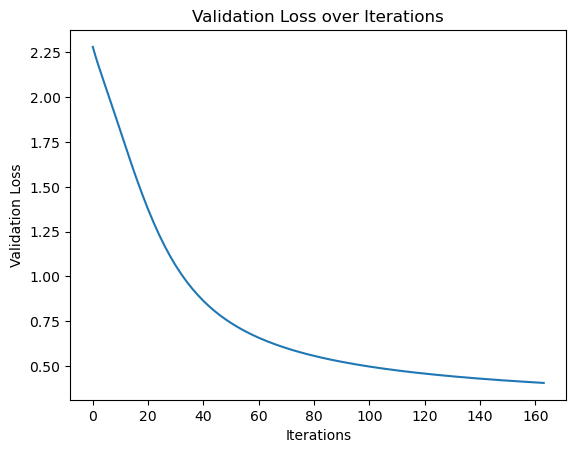

In [ ]:
X_train, Y_train, X_val, Y_val = load_data()
W1, b1, W2, b2, dev_losses = gradient_descent(X_train, Y_train, X_val, Y_val, iterations=50000, alpha=0.1, n_hidden=100, patience=10, tolerance=1e-2)

#Evaluate validation set
predictions_dev = make_predictions(X_val, W1, b1, W2, b2)
accuracy_dev = get_accuracy(predictions_dev, Y_val)
print(f"Validation Set Accuracy: {accuracy_dev:.4f}")

#Plot development loss
plt.plot(range(0, len(dev_losses)), dev_losses)
plt.xlabel("Iterations")
plt.ylabel("Validation Loss")
plt.title("Validation Loss over Iterations")
plt.show()

Test Four Random Examples

Validation Set Accuracy: 0.8840
MNIST ID:  46577
Prediction:  7
Label:  7


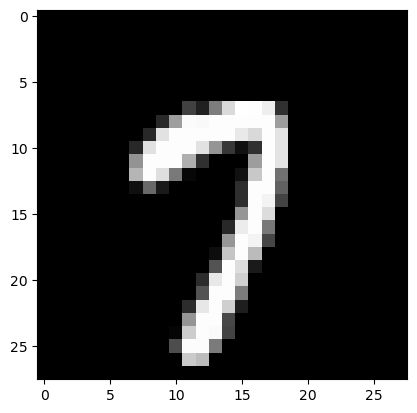

MNIST ID:  57606
Prediction:  2
Label:  2


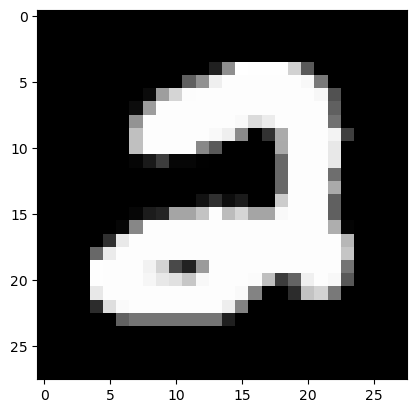

MNIST ID:  34556
Prediction:  4
Label:  4


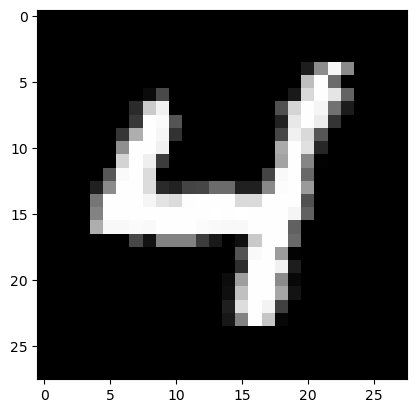

MNIST ID:  42460
Prediction:  6
Label:  6


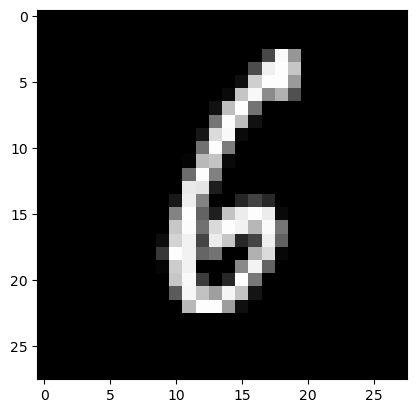

MNIST ID:  53715
Prediction:  1
Label:  5


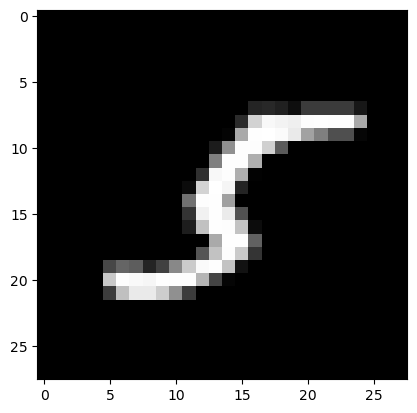

In [49]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, A2 = forward_prop(W1, b1, W2, b2, X) #correct number of return values.
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2, X_train, Y_train): #Added X_train and Y_train as parameters.
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)[0] #added [0] to get the prediction value.
    label = Y_train[index]
    print("MNIST ID: ", random_index)
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

print(f"Validation Set Accuracy: {accuracy_dev:.4f}")

for _ in range(5):
    random_index = random.randint(0, X_train.shape[1] - 1)
    test_prediction(random_index, W1, b1, W2, b2, X_train, Y_train)